# Baseline_Armine's_version

В конкурсе представлены реальные данные объявлений о продаже товаров с сайта Avito.

Для удобства пользователей каждое объявление размещается в одной из категорий в зависимости от типа продаваемого товара. 

Всего в выборке 50 различных категорий.

Вам предлагается построить алгоритм, который на основе текстов объявлений будет предсказывать категорию товара.





Загрузим данные и посмотрим на них

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
Train = pd.read_csv('/Users/armine/Downloads/texts-classification-ml-hse-2019/train.csv')

In [3]:
Test = pd.read_csv('/Users/armine/Downloads/texts-classification-ml-hse-2019/test.csv')

In [4]:
Train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [5]:
Test.head()

,title,description,itemid
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804
3,Запчасти для GLE,Запчасти GLE,1689811299
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240


In [6]:
Train.isnull().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [7]:
Test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

Видно, что есть объекты с пропуском в текстовом поле `description`. Заменим пропуски на пустую строку

In [8]:
Train.fillna('', inplace=True)

In [9]:
Test.fillna('', inplace=True)

Для простоты конкатенируем строки из полей `title` и `description`

In [10]:
Train['title&description'] = Train['title'].str[:] + ' \\\n' + Train['description'].str[:]

In [11]:
Test['title&description'] = Test['title'].str[:] + ' \\\n' + Test['description'].str[:]

In [12]:
Train['Category_name'].describe()

count                       4234042
unique                           50
top       Одежда, обувь, аксессуары
freq                         765120
Name: Category_name, dtype: object

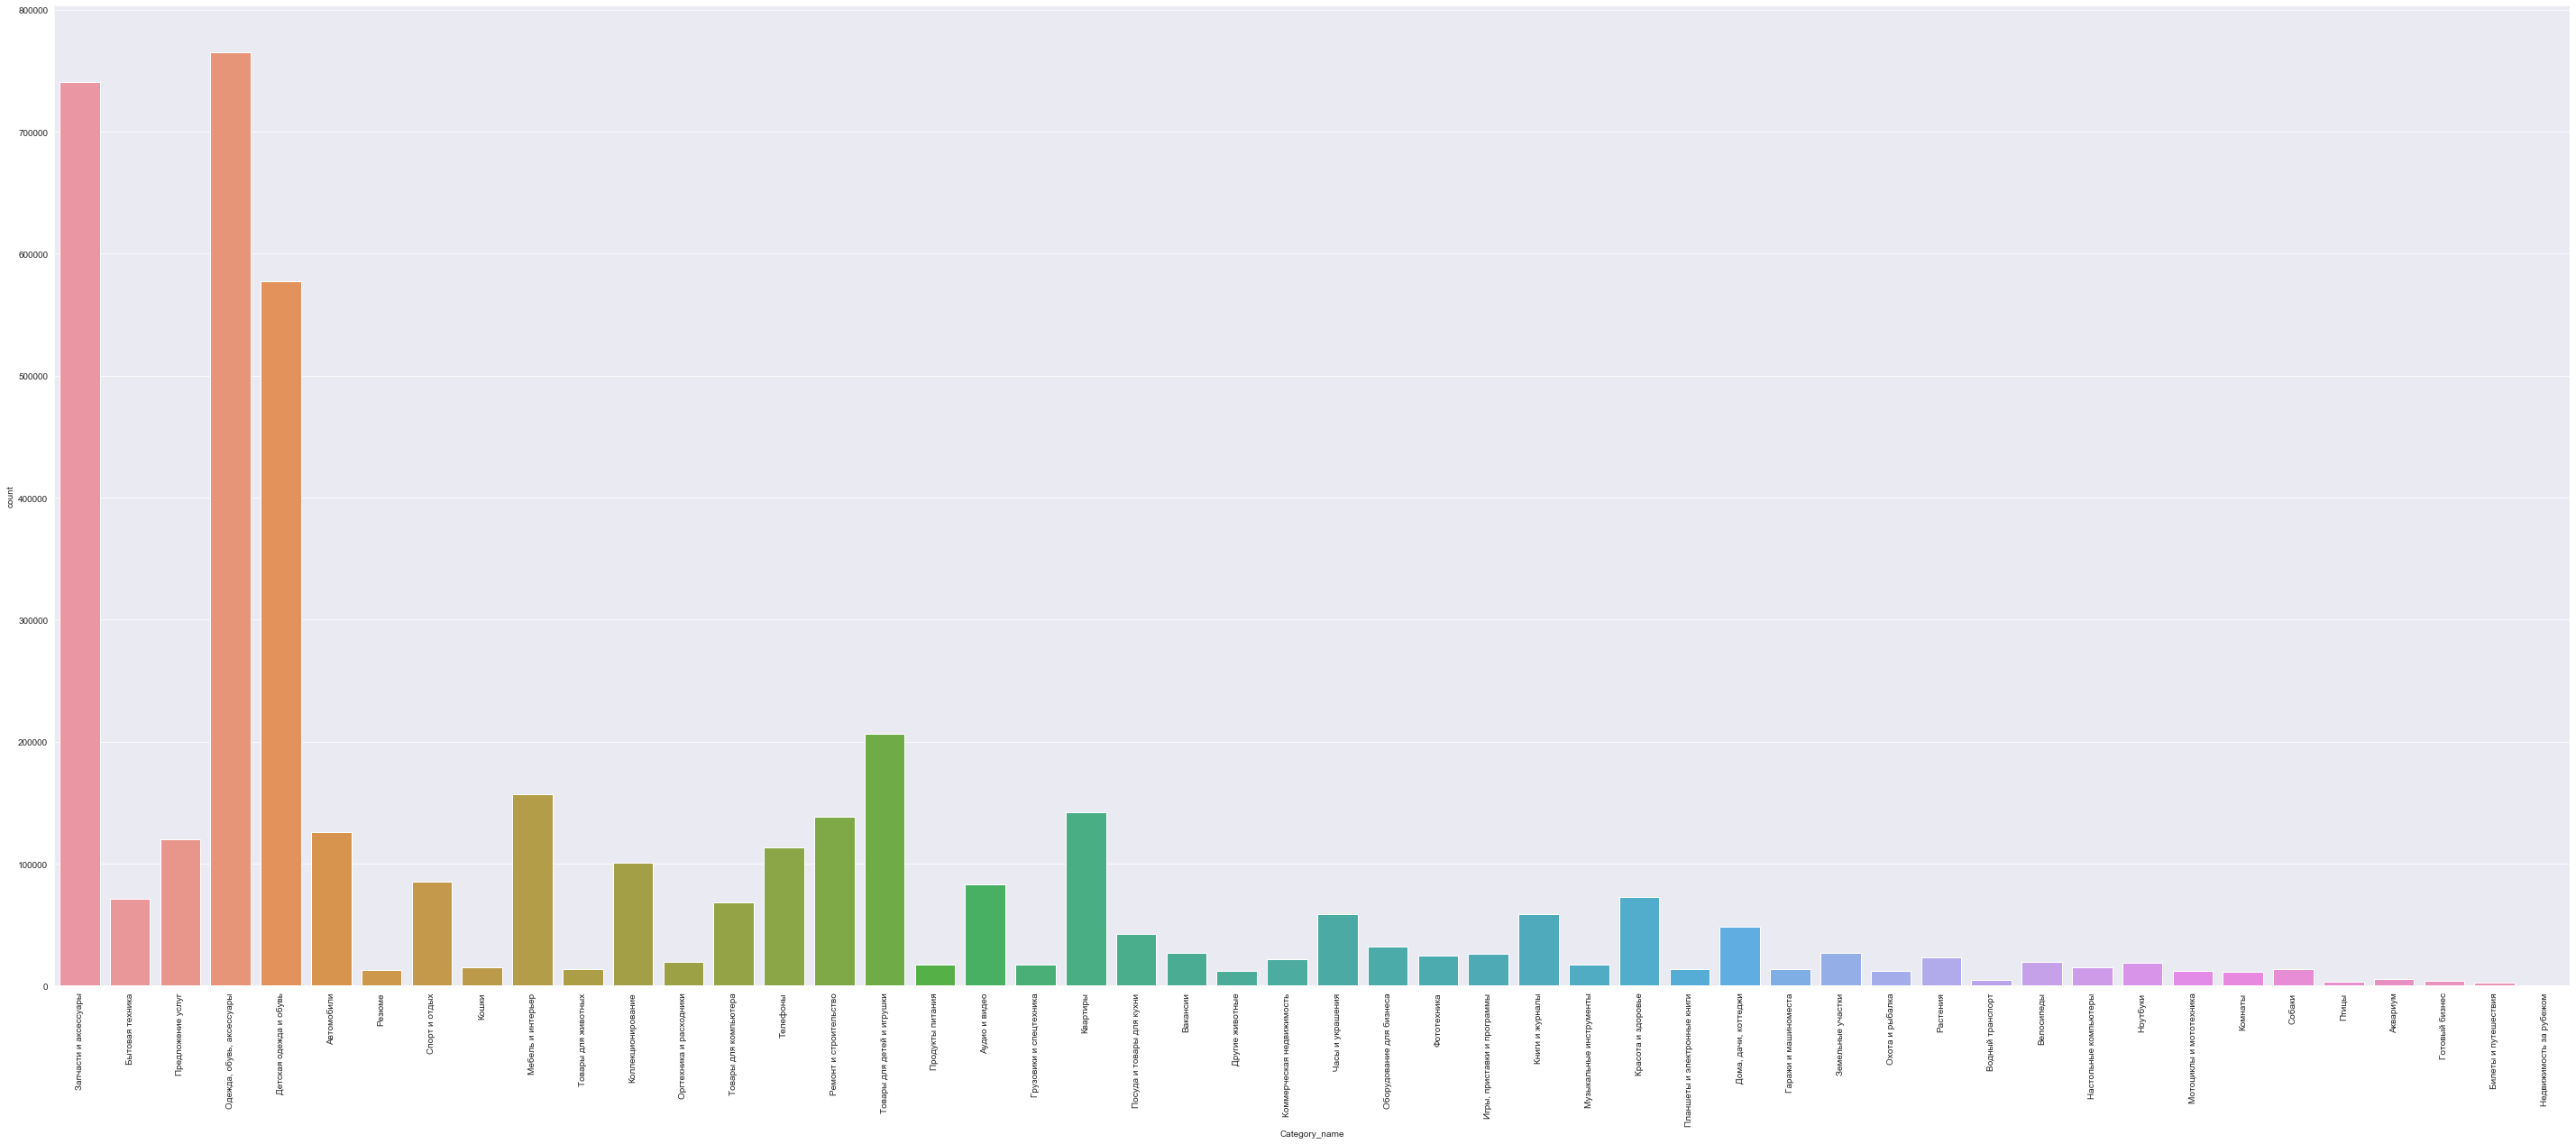

In [13]:
plt.figure(figsize = (50, 20))
sns.countplot(Train['Category_name'])
plt.xticks(rotation = 'vertical')
plt.show()

In [14]:
!pip install nltk

In [15]:
import nltk

In [16]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/armine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords

russian_stopwords = stopwords.words("russian")

In [18]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [19]:
Train.head()

,title,description,Category_name,Category,title&description
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год \\nПродам/\n ...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом \\nВозьму машину в аре...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,Полусапожки \\nполусапожки в отличном состояни...
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные \\nКожаные(натур) босоножки ...


# Применим ```Tfidf``` преобразование к текстам, чтобы получить признаковое описание каждого объявления

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Train[['title&description']], Train['Category'], train_size=0.75)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tf_idf = TfidfVectorizer(stop_words=russian_stopwords)
tf_idf.fit(X_train['title&description'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [23]:
X_train_tf_idf = tf_idf.transform(X_train['title&description'])
X_test_tf_idf = tf_idf.transform(X_test['title&description'])

Посмотрим на полученные размеры матриц объекты-признаки

In [25]:
X_train_tf_idf.shape

(3175531, 1784935)

In [26]:
X_train_tf_idf[0]

<1x1784935 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [27]:
X_test_tf_idf.shape

(1058511, 1784935)

# Обучим линейный классификатор на полученных данных

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
from sklearn.svm import LinearSVC

In [30]:
linear_svm = LinearSVC(C=0.5,verbose=10)

In [31]:
linear_svm.fit(X_train_tf_idf, y_train)

[LibLinear]

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=10)

Посчитаем качество предсказания по метрике ``Accuracy``

In [32]:
accuracy_score(y_test, linear_svm.predict(X_test_tf_idf))

0.9170400685491223

Подготовим файл с предсказаниями категорий для `Test.csv` 

In [33]:
tf_idf = TfidfVectorizer(stop_words=russian_stopwords)
tf_idf.fit(Train['title&description'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [34]:
Train_tf_idf = tf_idf.transform(Train['title&description'])
Test_tf_idf = tf_idf.transform(Test['title&description'])

In [35]:
linear_svm = LinearSVC(verbose=10, C=0.5)
linear_svm.fit(Train_tf_idf, Train['Category'])

[LibLinear]

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=10)

In [36]:
Answer = pd.DataFrame(columns=['Id', 'Category'])
Answer['Id'] = Test['itemid']

In [37]:
Answer['Category'] = linear_svm.predict(Test_tf_idf)

In [38]:
Answer.to_csv('my_submission_DS_club_invitation.csv', index=None)